<!-- dom:TITLE: Solving Quantum Mechanical Many-body Problems with Machine Learning Algorithms -->
# Solving Quantum Mechanical Many-body Problems with Machine Learning Algorithms
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, USA & Department of Physics and Center for Computing in Science Education, University of Oslo, Norway -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, USA and Department of Physics and Center for Computing in Science Education, University of Oslo, Norway

Date: **University of Surrey, Guildford, UK, October  1, 2019. Codes and slides at <https://github.com/mhjensenseminars/MachineLearningTalk>**

## What is this talk about?
The main aim is to give you a short and pedestrian introduction to  how we can use Machine Learning methods
to solve quantum mechanical many-body problems. And why this could be of interest. 

The hope is that after this talk you have gotten the basic ideas to get you started. Peeping into <https://github.com/mhjensenseminars/MachineLearningTalk>, you'll find a Jupyter notebook, slides, codes etc that will allow you to reproduce the simulations discussed here, and perhaps run your own very first calculations.




## More material
More in depth notebooks are at 
1. Making a professional Monte Carlo code for quantum mechanical simulations <https://github.com/CompPhysics/ComputationalPhysics2/blob/gh-pages/doc/pub/notebook1/ipynb/notebook1.ipynb>

2. From Variational Monte Carlo to Boltzmann Machines <https://github.com/CompPhysics/ComputationalPhysics2/blob/gh-pages/doc/pub/notebook2/ipynb/notebook2.ipynb>

Feel free to try them  out and please don't hesitate to ask if something is unclear.




## Why? Basic motivation

How can we avoid the dimensionality curse? Many possibilities
1. smarter basis functions

2. resummation of specific correlations

3. stochastic sampling of high-lying states (stochastic FCI, CC and SRG/IMSRG)

4. many more

Machine Learning and Quantum Computing hold also great promise in tackling the 
ever increasing dimensionalities. Here we will focus on Machine Learning.



## Overview
* Short intro to Machine Learning

* Variational Monte Carlo (Markov Chain Monte Carlo, $\mathrm{MC}^2$) and two-electron quantum dots, solving quantum mechanical problems in a stochastic way. It  will serve as  our motivation for switching to Machine Learning. 

* From Variational Monte Carlo to Boltzmann Machines and Machine Learning



## What is Machine Learning?
Machine learning is the science of giving computers the ability to
learn without being explicitly programmed.  The idea is that there
exist generic algorithms which can be used to find patterns in a broad
class of data sets without having to write code specifically for each
problem. The algorithm will build its own logic based on the data.

Machine learning is a subfield of computer science, and is closely
related to computational statistics.  It evolved from the study of
pattern recognition in artificial intelligence (AI) research, and has
made contributions to AI tasks like computer vision, natural language
processing and speech recognition. It has also, especially in later
years, found applications in a wide variety of other areas, including
bioinformatics, economy, physics, finance and marketing.

You will notice however that many of the basic ideas discussed here come from Physics!





## What are the Machine Learning calculations here based on?

This work is inspired by the idea of representing the wave function with
a restricted Boltzmann machine (RBM), presented recently by [G. Carleo and M. Troyer, Science **355**, Issue 6325, pp. 602-606 (2017)](http://science.sciencemag.org/content/355/6325/602). They
named such a wave function/network a *neural network quantum state* (NQS). In their article they apply it to the quantum mechanical
spin lattice systems of the Ising model and Heisenberg model, with
encouraging results.

Thanks to Jane Kim (MSU), Julie Butler (MSU), Vilde Flugsrud (UiO), Alfred Alocias Mariadason (UiO), Even Nordhagen (UiO), Bendik Samseth (UiO) and Robert Solli (UiO) for many discussions and interpretations.



## A new world
Machine learning (ML) is an extremely rich field, in spite of its young age. The
increases we have seen during the last three decades in computational
capabilities have been followed by developments of methods and
techniques for analyzing and handling large date sets, relying heavily
on statistics, computer science and mathematics.  The field is rather
new and developing rapidly. 

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/)

* [Keras](https://keras.io/),

and more. These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.



## Lots of room for creativity
Not all the
algorithms and methods can be given a rigorous mathematical
justification, opening up thereby for experimenting
and trial and error and thereby exciting new developments.



A solid command of linear algebra, multivariate theory, 
probability theory, statistical data analysis, optimization algorithms, 
understanding errors and Monte Carlo methods is important in order to understand many of the 
various algorithms and methods.



**Job market, a personal statement**: [A familiarity with ML is almost becoming a prerequisite for many of the most exciting employment opportunities](https://www.analyticsindiamag.com/top-countries-hiring-most-number-of-artificial-intelligence-machine-learning-experts/). And add quantum computing and there you are!


## Knowledge of Statistical analysis and optimization of data
Some key elements that enter much of the discussion on ML:
1. Basic concepts, expectation values, variance, covariance, correlation functions and errors;

2. Simpler models, binomial distribution, the Poisson distribution, simple and multivariate normal distributions;

3. Central elements of Bayesian statistics and modeling;

4. Central elements from linear algebra

5. Gradient methods for data optimization

6. Monte Carlo methods, Markov chains, Metropolis-Hastings algorithm;

7. Estimation of errors using cross-validation, blocking, bootstrapping and jackknife methods;

8. Practical optimization using Singular-value decomposition and least squares for parameterizing data.

9. Principal Component Analysis.

<!-- !split  -->
## Some members of the ML family

1. Linear regression and its variants, Logistic regression

2. Decision tree algorithms, from simpler to more complex ones like random forests

3. Bayesian statistics 

4. Support vector machines and finally various variants of

5. Artifical neural networks (NN) and deep learning

6. Convolutional NN, autoenconders, Recurrent NN, Boltzmann machines

7. and many more



## What are the basic ingredients?
Almost every problem in ML and data science starts with the same ingredients:
* The dataset $\mathbf{x}$ (could be some observable quantity of the system we are studying)

* A model which is a function of a set of parameters $\mathbf{\alpha}$ that relates to the dataset, say a likelihood  function $p(\mathbf{x}\vert \mathbf{\alpha})$ or just a simple model $f(\mathbf{\alpha})$

* A so-called **cost** function $\mathcal{C} (\mathbf{x}, f(\mathbf{\alpha}))$ which allows us to decide how well our model represents the dataset. 

We seek to minimize the function $\mathcal{C} (\mathbf{x}, f(\mathbf{\alpha}))$ by finding the parameter values which minimize $\mathcal{C}$. This leads to  various minimization algorithms. It may surprise many, but at the heart of all machine learning algortihms there is an optimization problem.




## Types of Machine Learning

The approaches to machine learning are many, but are often split into two main categories. 
In *supervised learning* we know the answer to a problem,
and let the computer deduce the logic behind it. On the other hand, *unsupervised learning*
is a method for finding patterns and relationship in data sets without any prior knowledge of the system.
Some authours also operate with a third category, namely *reinforcement learning*. This is a paradigm 
of learning inspired by behavioural psychology, where learning is achieved by trial-and-error, 
solely from rewards and punishment.

Another way to categorize machine learning tasks is to consider the desired output of a system.
Some of the most common tasks are:

  * Classification: Outputs are divided into two or more classes. The goal is to   produce a model that assigns inputs into one of these classes. An example is to identify  digits based on pictures of hand-written ones. Classification is typically supervised learning.

  * Regression: Finding a functional relationship between an input data set and a reference data set.   The goal is to construct a function that maps input data to continuous output values.

  * Clustering: Data are divided into groups with certain common traits, without knowing the different groups beforehand.  It is thus a form of unsupervised learning.




## References
* An excellent reference, [Mehta et al.](https://arxiv.org/abs/1803.08823) and [Physics Reports (2019)](https://www.sciencedirect.com/science/article/pii/S0370157319300766?via%3Dihub).

* [Machine Learning and the Physical Sciences by Carleo et al](https://arxiv.org/abs/1903.10563)

* [Many-electron systems with Deep Learning](https://arxiv.org/pdf/1909.02487.pdf)

* [Every issue of Physical Review Letters has now one or more articles on ML](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.120.156001)

* [Classifying Nuclear Physics  experiments from the NSCL](https://github.com/copperwire/thesis/blob/master/main.pdf)

* [Software and thesis on many-body methods and Machine Learning](https://github.com/bsamseth/qflow)

* [Books and lectures notes](https://github.com/CompPhysics/MachineLearning) and see also the course [FYS-STK3155/4155](https://www.uio.no/studier/emner/matnat/fys/FYS-STK4155/h18/index.html)





## Fitting Nuclear Masses

Let us now dive into  nuclear physics and remind ourselves briefly about some basic features about binding
energies.  A basic quantity which can be measured for the ground
states of nuclei is the atomic mass $M(N, Z)$ of the neutral atom with
atomic mass number $A$ and charge $Z$. The number of neutrons is $N$. There are indeed several sophisticated experiments worldwide which allow us to measure this quantity to high precision (parts per million even). 

Atomic masses are usually tabulated in terms of the mass excess defined by

$$
\Delta M(N, Z) =  M(N, Z) - uA,
$$

where $u$ is the Atomic Mass Unit

$$
u = M(^{12}\mathrm{C})/12 = 931.4940954(57) \hspace{0.1cm} \mathrm{MeV}/c^2.
$$

In the [2016 mass evaluation of by W.J.Huang, G.Audi, M.Wang, F.G.Kondev, S.Naimi and X.Xu](http://nuclearmasses.org/resources_folder/Wang_2017_Chinese_Phys_C_41_030003.pdf)
there are data on masses and decays of 3437 nuclei.

The nuclear binding energy is defined as the energy required to break
up a given nucleus into its constituent parts of $N$ neutrons and $Z$
protons. In terms of the atomic masses $M(N, Z)$ the binding energy is
defined by

$$
BE(N, Z) = ZM_H c^2 + Nm_n c^2 - M(N, Z)c^2 ,
$$

where $M_H$ is the mass of the hydrogen atom and $m_n$ is the mass of the neutron.
In terms of the mass excess the binding energy is given by

$$
BE(N, Z) = Z\Delta_H c^2 + N\Delta_n c^2 -\Delta(N, Z)c^2 ,
$$

where $\Delta_H c^2 = 7.2890$ MeV and $\Delta_n c^2 = 8.0713$ MeV.


A popular and physically intuitive model which can be used to parametrize 
the experimental binding energies as function of $A$, is the so-called 
**liquid drop model**. The ansatz is based on the following expression

$$
BE(N,Z) = a_1A-a_2A^{2/3}-a_3\frac{Z^2}{A^{1/3}}-a_4\frac{(N-Z)^2}{A},
$$

where $A$ stands for the number of nucleons and the $a_i$s are parameters which are determined by a fit 
to the experimental data.  

### Organizing our data

Let us start with reading and organizing our data. 
We start with the compilation of masses and binding energies from 2016.
After having downloaded this file to our own computer, we are now ready to read the file and start structuring our data.


We start with preparing folders for storing our calculations and the data file over masses and binding energies. We import also various modules that we will find useful in order to present various Machine Learning methods. Here we focus mainly on the functionality of **scikit-learn**.

In [1]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("MassEval2016.dat"),'r')

Before we proceed, we define also a function for making our plots. You can obviously avoid this and simply set up various **matplotlib** commands every time you need them. You may however find it convenient to collect all such commands in one function and simply call this function.

In [2]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

def MakePlot(x,y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label = labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

Our next step is to read the data on experimental binding energies and
reorganize them as functions of the mass number $A$, the number of
protons $Z$ and neutrons $N$ using **pandas**.  Before we do this it is
always useful (unless you have a binary file or other types of compressed
data) to actually open the file and simply take a look at it!


In particular, the program that outputs the final nuclear masses is written in Fortran with a specific format. It means that we need to figure out the format and which columns contain the data we are interested in. Pandas comes with a function that reads formatted output. After having admired the file, we are now ready to start massaging it with **pandas**. The file begins with some basic format information.

In [3]:
"""                                                                                                                         
This is taken from the data file of the mass 2016 evaluation.                                                               
All files are 3436 lines long with 124 character per line.                                                                  
       Headers are 39 lines long.                                                                                           
   col 1     :  Fortran character control: 1 = page feed  0 = line feed                                                     
   format    :  a1,i3,i5,i5,i5,1x,a3,a4,1x,f13.5,f11.5,f11.3,f9.3,1x,a2,f11.3,f9.3,1x,i3,1x,f12.5,f11.5                     
   These formats are reflected in the pandas widths variable below, see the statement                                       
   widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),                                                            
   Pandas has also a variable header, with length 39 in this case.                                                          
"""

The data we are interested in are in columns 2, 3, 4 and 11, giving us
the number of neutrons, protons, mass numbers and binding energies,
respectively. We add also for the sake of completeness the element name. The data are in fixed-width formatted lines and we will
covert them into the **pandas** DataFrame structure.

In [2]:
# Read the experimental data with Pandas
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the Ebinding column won't be numeric. Coerce to float and drop these entries.
Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
# Convert from keV to MeV.
Masses['Ebinding'] /= 1000

# Group the DataFrame by nucleon number, A.
Masses = Masses.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])

We have now read in the data, grouped them according to the variables we are interested in. 
We see how easy it is to reorganize the data using **pandas**. If we
were to do these operations in C/C++ or Fortran, we would have had to
write various functions/subroutines which perform the above
reorganizations for us.  Having reorganized the data, we can now start
to make some simple fits using both the functionalities in **numpy** and
**Scikit-Learn** afterwards. 

Now we define five variables which contain
the number of nucleons $A$, the number of protons $Z$ and the number of neutrons $N$, the element name and finally the energies themselves.

In [3]:
A = Masses['A']
Z = Masses['Z']
N = Masses['N']
Element = Masses['Element']
Energies = Masses['Ebinding']
print(Masses)

            N    Z    A Element  Ebinding
A                                        
1   0       0    1    1       H  0.000000
2   1       1    1    2       H  1.112283
3   2       2    1    3       H  2.827265
4   6       2    2    4      He  7.073915
5   9       3    2    5      He  5.512132
6   14      3    3    6      Li  5.332331
7   19      4    3    7      Li  5.606439
8   24      4    4    8      Be  7.062435
9   29      5    4    9      Be  6.462668
10  34      6    4   10      Be  6.497630
11  40      6    5   11       B  6.927732
12  46      6    6   12       C  7.680144
13  52      7    6   13       C  7.469849
14  57      8    6   14       C  7.520319
15  64      8    7   15       N  7.699460
16  72      8    8   16       O  7.976206
17  78      9    8   17       O  7.750728
18  85     10    8   18       O  7.767097
19  93     10    9   19       F  7.779018
20  102    10   10   20      Ne  8.032240
21  110    11   10   21      Ne  7.971713
22  118    12   10   22      Ne  8

The next step, and we will define this mathematically later, is to set up the so-called **design matrix**. We will throughout call this matrix $\boldsymbol{X}$.
It has dimensionality $p\times n$, where $n$ is the number of data points and $p$ are the so-called predictors. In our case here they are given by the number of polynomials in $A$ we wish to include in the fit.

In [4]:
# Now we set up the design matrix X
X = np.zeros((len(A),5))
X[:,0] = 1
X[:,1] = A
X[:,2] = A**(2.0/3.0)
X[:,3] = A**(-1.0/3.0)
X[:,4] = A**(-1.0)

With **scikitlearn** we are now ready to use linear regression and fit our data.

In [5]:
clf = skl.LinearRegression().fit(X, Energies)
fity = clf.predict(X)

Pretty simple!  
Now we can print measures of how our fit is doing, the coefficients from the fits and plot the final fit together with our data.

Mean squared error: 0.04
Variance score: 0.95
Mean absolute error: 0.05
[ 0.00000000e+00  7.06492086e-03 -1.73091052e-01 -1.66020213e+01
  1.17385778e+00] 15.212327334149492


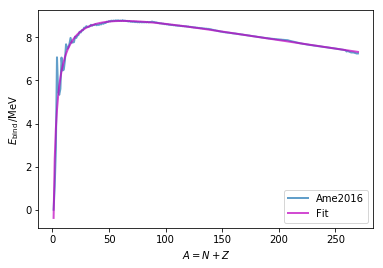

In [6]:
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, fity))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, fity))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, fity))
print(clf.coef_, clf.intercept_)

Masses['Eapprox']  = fity
# Generate a plot comparing the experimental with the fitted values values.
fig, ax = plt.subplots()
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.plot(Masses['A'], Masses['Ebinding'], alpha=0.7, lw=2,
            label='Ame2016')
ax.plot(Masses['A'], Masses['Eapprox'], alpha=0.7, lw=2, c='m',
            label='Fit')
ax.legend()
save_fig("Masses2016")
plt.show()

## Artificial neurons

The field of artificial neural networks has a long history of
development, and is closely connected with the advancement of computer
science and computers in general. A model of artificial neurons was
first developed by McCulloch and Pitts in 1943 to study signal
processing in the brain and has later been refined by others. The
general idea is to mimic neural networks in the human brain, which is
composed of billions of neurons that communicate with each other by
sending electrical signals.  Each neuron accumulates its incoming
signals, which must exceed an activation threshold to yield an
output. If the threshold is not overcome, the neuron remains inactive,
i.e. has zero output.

This behaviour has inspired a simple mathematical model for an artificial neuron.

$$
y = f\left(\sum_{i=1}^n w_ix_i\right) = f(u)
$$

Here, the output $y$ of the neuron is the value of its activation function, which have as input
a weighted sum of signals $x_i, \dots ,x_n$ received by $n$ other neurons.



## A simple perceptron model

<!-- dom:FIGURE: [figures/perceptron.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/perceptron.png" width=700>

<!-- end figure -->



## Neural network types
An artificial neural network (NN), is a computational model that consists of layers of connected neurons, or *nodes*. 
It is supposed to mimic a biological nervous system by letting each neuron interact with other neurons
by sending signals in the form of mathematical functions between layers. 
A wide variety of different NNs have
been developed, but most of them consist of an input layer, an output layer and eventual layers in-between, called
*hidden layers*. All layers can contain an arbitrary number of nodes, and each connection between two nodes
is associated with a weight variable. 

<!-- dom:FIGURE: [figures/dnn.png, width=500 frac=0.6] -->
<!-- begin figure -->

<p></p>
<img src="figures/dnn.png" width=500>

<!-- end figure -->





## The system: two electrons in a harmonic oscillator trap in two dimensions

The Hamiltonian of the quantum dot is given by

$$
\hat{H} = \hat{H}_0 + \hat{V},
$$

where $\hat{H}_0$ is the many-body HO Hamiltonian, and $\hat{V}$ is the
inter-electron Coulomb interactions. In dimensionless units,

$$
\hat{V}= \sum_{i < j}^N \frac{1}{r_{ij}},
$$

with $r_{ij}=\sqrt{\mathbf{r}_i^2 - \mathbf{r}_j^2}$.

This leads to the  separable Hamiltonian, with the relative motion part given by ($r_{ij}=r$)

$$
\hat{H}_r=-\nabla^2_r + \frac{1}{4}\omega^2r^2+ \frac{1}{r},
$$

plus a standard Harmonic Oscillator problem  for the center-of-mass motion.
This system has analytical solutions in two and three dimensions ([M. Taut 1993 and 1994](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.48.3561)). 

## Quantum Monte Carlo Motivation
Given a hamiltonian $H$ and a trial wave function $\Psi_T$, the variational principle states that the expectation value of $\langle H \rangle$, defined through

$$
\langle E \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})H(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})},
$$

is an upper bound to the ground state energy $E_0$ of the hamiltonian $H$, that is

$$
E_0 \le \langle E \rangle.
$$

In general, the integrals involved in the calculation of various  expectation values  are multi-dimensional ones. Traditional integration methods such as the Gauss-Legendre will not be adequate for say the  computation of the energy of a many-body system.




## Quantum Monte Carlo Motivation
**Basic steps.**

Choose a trial wave function
$\psi_T(\boldsymbol{R})$.

$$
P(\boldsymbol{R},\boldsymbol{\alpha})= \frac{\left|\psi_T(\boldsymbol{R},\boldsymbol{\alpha})\right|^2}{\int \left|\psi_T(\boldsymbol{R},\boldsymbol{\alpha})\right|^2d\boldsymbol{R}}.
$$

This is our model, or likelihood/probability distribution function  (PDF). It depends on some variational parameters $\boldsymbol{\alpha}$.
The approximation to the expectation value of the Hamiltonian is now

$$
\langle E[\boldsymbol{\alpha}] \rangle = 
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R},\boldsymbol{\alpha})H(\boldsymbol{R})\Psi_T(\boldsymbol{R},\boldsymbol{\alpha})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R},\boldsymbol{\alpha})\Psi_T(\boldsymbol{R},\boldsymbol{\alpha})}.
$$

## Quantum Monte Carlo Motivation
**Define a new quantity.**

$$
E_L(\boldsymbol{R},\boldsymbol{\alpha})=\frac{1}{\psi_T(\boldsymbol{R},\boldsymbol{\alpha})}H\psi_T(\boldsymbol{R},\boldsymbol{\alpha}),
$$

called the local energy, which, together with our trial PDF yields

$$
\langle E[\boldsymbol{\alpha}] \rangle=\int P(\boldsymbol{R})E_L(\boldsymbol{R},\boldsymbol{\alpha}) d\boldsymbol{R}\approx \frac{1}{N}\sum_{i=1}^NE_L(\boldsymbol{R_i},\boldsymbol{\alpha})
$$

with $N$ being the number of Monte Carlo samples.




## Quantum Monte Carlo
The Algorithm for performing a variational Monte Carlo calculations runs thus as this

   * Initialisation: Fix the number of Monte Carlo steps. Choose an initial $\boldsymbol{R}$ and variational parameters $\alpha$ and calculate $\left|\psi_T(\boldsymbol{R},\boldsymbol{\alpha})\right|^2$. 

   * Initialise the energy and the variance and start the Monte Carlo calculation by looping over trials.

      * Calculate  a trial position  $\boldsymbol{R}_p=\boldsymbol{R}+r*step$ where $r$ is a random variable $r \in [0,1]$.

      * Metropolis algorithm to accept or reject this move  $w = P(\boldsymbol{R}_p,\boldsymbol{\alpha})/P(\boldsymbol{R},\boldsymbol{\alpha})$.

      * If the step is accepted, then we set $\boldsymbol{R}=\boldsymbol{R}_p$. 

      * Update averages


   * Finish and compute final averages.

Observe that the jumping in space is governed by the variable *step*. This is often called brute-force sampling.
Need importance sampling to get more relevant sampling.



## The trial wave function
We want to perform  a Variational Monte Carlo calculation of the ground state of two electrons in a quantum dot well with different oscillator energies, assuming total spin $S=0$.
Our trial wave function has the following form

<!-- Equation labels as ordinary links -->
<div id="eq:trial"></div>

$$
\begin{equation}
   \psi_{T}(\boldsymbol{r}_1,\boldsymbol{r}_2) = 
   C\exp{\left(-\alpha_1\omega(r_1^2+r_2^2)/2\right)}
   \exp{\left(\frac{r_{12}}{(1+\alpha_2 r_{12})}\right)}, 
\label{eq:trial} \tag{1}
\end{equation}
$$

where the variables $\alpha_1$ and $\alpha_2$ represent our variational parameters.

Why does the trial function look like this? How did we get there? **This will one of our main motivations** for switching to
Machine Learning.



## The correlation part of the wave function

To find an ansatz for the correlated part of the wave function, it is useful to rewrite the two-particle
local energy in terms of the relative and center-of-mass motion.
Let us denote the distance between the two electrons as
$r_{12}$. We omit the center-of-mass motion since we are only interested in the case when
$r_{12} \rightarrow 0$. The contribution from the center-of-mass (CoM) variable $\boldsymbol{R}_{\mathrm{CoM}}$
gives only a finite contribution.
We focus only on the terms that are relevant for $r_{12}$ and for three dimensions. The relevant local energy operator becomes then (with $l=0$)

$$
\lim_{r_{12} \rightarrow 0}E_L(R)=
    \frac{1}{{\cal R}_T(r_{12})}\left(-2\frac{d^2}{dr_{ij}^2}-\frac{4}{r_{ij}}\frac{d}{dr_{ij}}+
\frac{2}{r_{ij}}\right){\cal R}_T(r_{12}).
$$

In order to avoid divergencies when $r_{12}\rightarrow 0$ we obtain  the so-called **cusp** condition

$$
\frac{d {\cal R}_T(r_{12})}{dr_{12}} = \frac{1}{2}
{\cal R}_T(r_{12})\qquad r_{12}\to 0
$$

## Resulting ansatz
The above  results in

$$
{\cal R}_T  \propto \exp{(r_{ij}/2)},
$$

for anti-parallel spins and

$$
{\cal R}_T  \propto \exp{(r_{ij}/4)},
$$

for anti-parallel spins. 
This is the so-called cusp condition for the relative motion, resulting in a minimal requirement
for the correlation part of the wave fuction.
For general systems containing more than say two electrons, we have this
condition for each electron pair $ij$.





## The VMC code

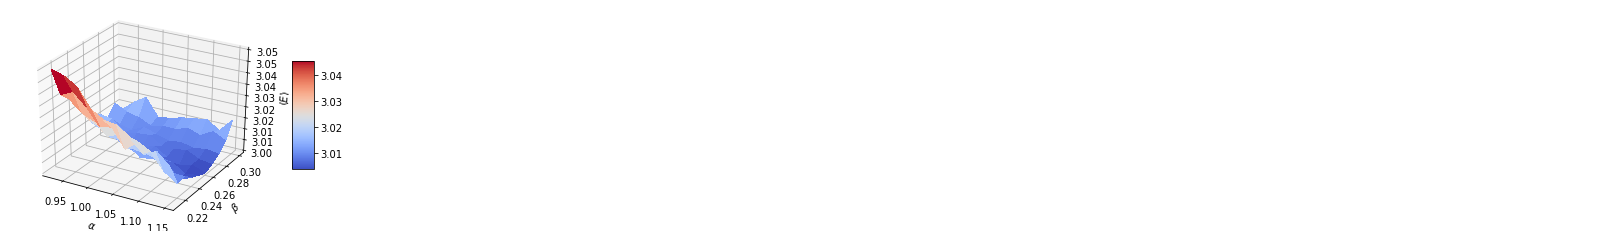

In [7]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

#Trial wave function for quantum dots in two dims
def WaveFunction(r,alpha,beta):
    r1 = r[0,0]**2 + r[0,1]**2
    r2 = r[1,0]**2 + r[1,1]**2
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = r12/(1+beta*r12)
    return exp(-0.5*alpha*(r1+r2)+deno)

#Local energy  for quantum dots in two dims, using analytical local energy
def LocalEnergy(r,alpha,beta):
    
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    return 0.5*(1-alpha*alpha)*(r1 + r2) +2.0*alpha + 1.0/r12+deno2*(alpha*r12-deno2+2*beta*deno-1.0/r12)

# The Monte Carlo sampling with the Metropolis algo
def MonteCarloSampling():

    NumberMCcycles= 100000
    StepSize = 1.0
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # seed for rng generator
    seed()
    # start variational parameter
    alpha = 0.9
    for ia in range(MaxVariations):
        alpha += .025
        AlphaValues[ia] = alpha
        beta = 0.2 
        for jb in range(MaxVariations):
            beta += .01
            BetaValues[jb] = beta
            energy = energy2 = 0.0
            DeltaE = 0.0
            #Initial position
            for i in range(NumberParticles):
                for j in range(Dimension):
                    PositionOld[i,j] = StepSize * (random() - .5)
            wfold = WaveFunction(PositionOld,alpha,beta)

            #Loop over MC MCcycles
            for MCcycle in range(NumberMCcycles):
                #Trial position
                for i in range(NumberParticles):
                    for j in range(Dimension):
                        PositionNew[i,j] = PositionOld[i,j] + StepSize * (random() - .5)
                wfnew = WaveFunction(PositionNew,alpha,beta)

                #Metropolis test to see whether we accept the move
                if random() < wfnew**2 / wfold**2:
                   PositionOld = PositionNew.copy()
                   wfold = wfnew
                   DeltaE = LocalEnergy(PositionOld,alpha,beta)
                energy += DeltaE
                energy2 += DeltaE**2

            #We calculate mean, variance and error ...
            energy /= NumberMCcycles
            energy2 /= NumberMCcycles
            variance = energy2 - energy**2
            error = sqrt(variance/NumberMCcycles)
            Energies[ia,jb] = energy    
    return Energies, AlphaValues, BetaValues


#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
MaxVariations = 10
Energies = np.zeros((MaxVariations,MaxVariations))
AlphaValues = np.zeros(MaxVariations)
BetaValues = np.zeros(MaxVariations)
(Energies, AlphaValues, BetaValues) = MonteCarloSampling()

# Prepare for plots
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
X, Y = np.meshgrid(AlphaValues, BetaValues)
surf = ax.plot_surface(X, Y, Energies,cmap=cm.coolwarm,linewidth=0, antialiased=False)
# Customize the z axis.
zmin = np.matrix(Energies).min()
zmax = np.matrix(Energies).max()
ax.set_zlim(zmin, zmax)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel(r'$\langle E \rangle$')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

a
## Technical aspect, improvements and how to define the cost function

**The above procedure is not the smartest one**. Looping over all
variational parameters becomes expensive.  Also, we don't use
importance sampling and optimizations of the standard deviation
(blocking, bootstrap, jackknife).  Such codes are included in the
above Github address.


We can also be smarter and use minimization methods to find the
**optimal** variational parameters with fewer Monte Carlo cycles and
then fire up our heavy artillery.

One way to achieve this is to minimize the energy as function of the variational parameters.



## Energy derivatives
To find the derivatives of the local energy expectation value as function of the variational parameters, we can use the chain rule and the hermiticity of the Hamiltonian.  

Let us define (with the notation $\langle E[\boldsymbol{\alpha}]\rangle =\langle  E_L\rangle$)

$$
\bar{E}_{\alpha_i}=\frac{d\langle  E_L\rangle}{d\alpha_i},
$$

as the derivative of the energy with respect to the variational parameter $\alpha_i$
We define also the derivative of the trial function (skipping the subindex $T$) as

$$
\bar{\Psi}_{i}=\frac{d\Psi}{d\alpha_i}.
$$

## Derivatives of the local energy
The elements of the gradient of the local energy are then (using the chain rule and the hermiticity of the Hamiltonian)

$$
\bar{E}_{i}= 2\left( \langle \frac{\bar{\Psi}_{i}}{\Psi}E_L\rangle -\langle \frac{\bar{\Psi}_{i}}{\Psi}\rangle\langle E_L \rangle\right).
$$

From a computational point of view it means that you need to compute the expectation values of

$$
\langle \frac{\bar{\Psi}_{i}}{\Psi}E_L\rangle,
$$

and

$$
\langle \frac{\bar{\Psi}_{i}}{\Psi}\rangle\langle E_L\rangle
$$

These integrals are evaluted using MC intergration (with all its possible error sources). 
We can then use methods like stochastic gradient or other minimization methods to find the optimal variational parameters (I don't discuss this topic here, but these methods are very important in ML).



## How do we define our cost function?
We have a model, our likelihood function. 

How should we define the cost function?



## Meet the variance and its derivatives
**Why the variance?**

Suppose the trial function (our model) is the exact wave function. The action of the hamiltionan
on the wave function

$$
H\Psi = \mathrm{constant}\times \Psi,
$$

The integral which defines various 
expectation values involving moments of the hamiltonian becomes then

$$
\langle E^n \rangle =   \langle H^n \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}(\boldsymbol{R})H^n(\boldsymbol{R})\Psi(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}(\boldsymbol{R})\Psi(\boldsymbol{R})}=
\mathrm{constant}\times\frac{\int d\boldsymbol{R}\Psi^{\ast}(\boldsymbol{R})\Psi(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}(\boldsymbol{R})\Psi(\boldsymbol{R})}=\mathrm{constant}.
$$

**This gives an important information: If I want the variance, the exact wave function leads to zero variance!**
The variance is defined as

$$
\sigma_E = \langle E^2\rangle - \langle E\rangle^2.
$$

Variation is then performed by minimizing both the energy and the variance.




## The variance defines the cost function
We can then take the derivatives of

$$
\sigma_E = \langle E^2\rangle - \langle E\rangle^2,
$$

with respect to the variational parameters. The derivatives of the variance can then be used to defined the
so-called Hessian matrix, which in turn allows us to use minimization methods like Newton's method or 
standard gradient methods. 

This leads to however a more complicated expression, with obvious errors when evaluating integrals by Monte Carlo integration. Less used, see however [Filippi and Umrigar](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.94.150201). The expression becomes complicated

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\bar{E}_{ij} = 2\left[ \langle (\frac{\bar{\Psi}_{ij}}{\Psi}+\frac{\bar{\Psi}_{j}}{\Psi}\frac{\bar{\Psi}_{i}}{\Psi})(E_L-\langle E\rangle)\rangle -\langle \frac{\bar{\Psi}_{i}}{\Psi}\rangle\bar{E}_j-\langle \frac{\bar{\Psi}_{j}}{\Psi}\rangle\bar{E}_i\right] 
\label{_auto1} \tag{2}
\end{equation}
$$

$$
\nonumber
+\langle \frac{\bar{\Psi}_{i}}{\Psi}E_L{_j}\rangle +\langle \frac{\bar{\Psi}_{j}}{\Psi}E_L{_i}\rangle -\langle \frac{\bar{\Psi}_{i}}{\Psi}\rangle\langle E_L{_j}\rangle \langle \frac{\bar{\Psi}_{j}}{\Psi}\rangle\langle E_L{_i}\rangle.
$$

Evaluating the cost function means having to evaluate the above second derivative of the energy.



## The code for two electrons in two dims with no Coulomb interaction

We present here the code (including importance sampling) for finding the optimal parameter $\alpha$ using gradient descent with a given learning rate $\eta$. In principle we should run calculations for various learning rates. 

Again, we start first with set up of various files.

In [ ]:
# 2-electron VMC code for 2dim quantum dot with importance sampling
# No Coulomb interaction
# Using gaussian rng for new positions and Metropolis- Hastings 
# Energy minimization using standard gradient descent 

# Common imports
from math import exp, sqrt
from random import random, seed, normalvariate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from numba import jit
from scipy.optimize import minimize


# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,alpha):
    r1 = r[0,0]**2 + r[0,1]**2
    r2 = r[1,0]**2 + r[1,1]**2
    return exp(-0.5*alpha*(r1+r2))

# Local energy  for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,alpha):
    
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    return 0.5*(1-alpha*alpha)*(r1 + r2) +2.0*alpha

# Derivate of wave function ansatz as function of variational parameters
def DerivativeWFansatz(r,alpha):
    
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    WfDer = -0.5*(r1+r2)
    return  WfDer

# Setting up the quantum force for the two-electron quantum dot, recall that it is a vector
def QuantumForce(r,alpha):

    qforce = np.zeros((NumberParticles,Dimension), np.double)
    qforce[0,:] = -2*r[0,:]*alpha
    qforce[1,:] = -2*r[1,:]*alpha
    return qforce

Then comes our Monte Carlo sampling.

In [ ]:
# Computing the derivative of the energy and the energy 
# jit decorator tells Numba to compile this function.
# The argument types will be inferred by Numba when function is called.
@jit
def EnergyMinimization(alpha):

    NumberMCcycles= 1000
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    # seed for rng generator 
    seed()
    energy = 0.0
    DeltaE = 0.0
    EnergyDer = 0.0
    DeltaPsi = 0.0
    DerivativePsiE = 0.0
    #Initial position
    for i in range(NumberParticles):
        for j in range(Dimension):
            PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
    wfold = WaveFunction(PositionOld,alpha)
    QuantumForceOld = QuantumForce(PositionOld,alpha)

    #Loop over MC MCcycles
    for MCcycle in range(NumberMCcycles):
        #Trial position moving one particle at the time
        for i in range(NumberParticles):
            for j in range(Dimension):
                PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                       QuantumForceOld[i,j]*TimeStep*D
            wfnew = WaveFunction(PositionNew,alpha)
            QuantumForceNew = QuantumForce(PositionNew,alpha)
            GreensFunction = 0.0
            for j in range(Dimension):
                GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
	                              (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
            GreensFunction = 1.0#exp(GreensFunction)
            ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
            #Metropolis-Hastings test to see whether we accept the move
            if random() <= ProbabilityRatio:
                for j in range(Dimension):
                    PositionOld[i,j] = PositionNew[i,j]
                    QuantumForceOld[i,j] = QuantumForceNew[i,j]
                wfold = wfnew
        DeltaE = LocalEnergy(PositionOld,alpha)
        DerPsi = DerivativeWFansatz(PositionOld,alpha)
        DeltaPsi +=DerPsi
        energy += DeltaE
        DerivativePsiE += DerPsi*DeltaE
            
    # We calculate mean values
    energy /= NumberMCcycles
    DerivativePsiE /= NumberMCcycles
    DeltaPsi /= NumberMCcycles
    EnergyDer  = 2*(DerivativePsiE-DeltaPsi*energy)
    return energy, EnergyDer

Finally, here we use the gradient descent method with a fixed learning rate and a fixed number of iterations.
This code is meant for illustrative purposes only. We could for example add a test which stops the number of
terations when the derivative has reached a certain by us fixed minimal value.

In [ ]:

#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
# guess for variational parameters
x0 = 0.5
# Set up iteration using stochastic gradient method
Energy =0 ; EnergyDer = 0
Energy, EnergyDer = EnergyMinimization(x0)

# No adaptive search for a minimum
eta = 0.5
Niterations = 50

Energies = np.zeros(Niterations)
EnergyDerivatives = np.zeros(Niterations)
AlphaValues = np.zeros(Niterations)
Totiterations = np.zeros(Niterations)

for iter in range(Niterations):
    gradients = EnergyDer
    x0 -= eta*gradients
    Energy, EnergyDer = EnergyMinimization(x0)
    Energies[iter] = Energy
    EnergyDerivatives[iter] = EnergyDer
    AlphaValues[iter] = x0
    Totiterations[iter] = iter

plt.subplot(2, 1, 1)
plt.plot(Totiterations, Energies, 'o-')
plt.title('Energy and energy derivatives')
plt.ylabel('Dimensionless energy')
plt.subplot(2, 1, 2)
plt.plot(Totiterations, EnergyDerivatives, '.-')
plt.xlabel(r'$\mathrm{Iterations}$', fontsize=15)
plt.ylabel('Energy derivative')
plt.show()
#nice printout with Pandas
import pandas as pd
from pandas import DataFrame
data ={'Alpha':AlphaValues, 'Energy':Energies,'Derivative':EnergyDerivatives}

frame = pd.DataFrame(data)
print(frame)

We see that the first derivative becomes smaller and smaller and after
some forty iterations, it is for all practical purposes almost
vanishing. The exact energy is $2.0$ and the optimal variational
parameter is $1.0$, as it should.




## Why Boltzmann machines?

What is known as restricted Boltzmann Machines (RMB) have received a
lot of attention lately.  One of the major reasons is that they can be
stacked layer-wise to build deep neural networks that capture
complicated statistics.

The original RBMs had just one visible layer and a hidden layer, but
recently so-called Gaussian-binary RBMs have gained quite some
popularity in imaging since they are capable of modeling continuous
data that are common to natural images.

Furthermore, they have been used to solve complicated quantum
mechanical many-particle problems or classical statistical physics
problems like the Ising and Potts classes of models.



## Boltzmann Machines

Why use a generative model rather than the more well known discriminative deep neural networks (DNN)? 

* Discriminitave methods have several limitations: They are mainly supervised learning methods, thus requiring labeled data. And there are tasks they cannot accomplish, like drawing new examples from an unknown probability distribution.

* A generative model can learn to represent and sample from a probability distribution. The core idea is to learn a parametric model of the probability distribution from which the training data was drawn. As an example

a. A model for images could learn to draw new examples of cats and dogs, given a training dataset of images of cats and dogs.

b. Generate a sample of an ordered or disordered Ising model phase, having been given samples of such phases.

c. Model the trial function for Monte Carlo calculations


## Some similarities and differences from DNNs

1. Both use gradient-descent based learning procedures for minimizing cost functions

2. Energy based models don't use backpropagation and automatic differentiation for computing gradients, instead turning to Markov Chain Monte Carlo methods.

3. DNNs often have several hidden layers. A restricted Boltzmann machine has normally only one hidden layer, however several RBMs can be stacked to make up Deep Belief Networks, of which they constitute the building blocks.

History: The RBM was developed by amongst others Geoffrey Hinton, called by some the "Godfather of Deep Learning", working with the University of Toronto and Google.


## Boltzmann machines (BM)

A BM is what we would call an undirected probabilistic graphical model
with stochastic continuous or discrete units.


It is interpreted as a stochastic recurrent neural network where the
state of each unit(neurons/nodes) depends on the units it is connected
to. The weights in the network represent thus the strength of the
interaction between various units/nodes.


It turns into a Hopfield network if we choose deterministic rather
than stochastic units. In contrast to a Hopfield network, a BM is a
so-called generative model. It allows us to generate new samples from
the learned distribution.



## A standard BM setup

A standard BM network is divided into a set of observable and visible units $\hat{x}$ and a set of unknown hidden units/nodes $\hat{h}$.



Additionally there can be bias nodes for the hidden and visible layers. These biases are normally set to $1$.



BMs are stackable, meaning we can train a BM which serves as input to another BM. We can construct deep networks for learning complex PDFs. The layers can be trained one after another, a feature which makes them popular in deep learning



However, they are often hard to train. This leads to the introduction of so-called restricted BMs, or RBMS.
Here we take away all lateral connections between nodes in the visible layer as well as connections between nodes in the hidden layer. The network is illustrated in the figure below.



## The structure of the RBM network

<!-- dom:FIGURE: [figures/RBM.png, width=800 frac=1.0] -->
<!-- begin figure -->

<p></p>
<img src="figures/RBM.png" width=800>

<!-- end figure -->




## The network

**The network layers**:
1. A function $\mathbf{x}$ that represents the visible layer, a vector of $M$ elements (nodes). This layer represents both what the RBM might be given as training input, and what we want it to be able to reconstruct. This might for example be the pixels of an image, the spin values of the Ising model, or coefficients representing speech.

2. The function $\mathbf{h}$ represents the hidden, or latent, layer. A vector of $N$ elements (nodes). Also called "feature detectors".

## Goals

The goal of the hidden layer is to increase the model's expressive power. We encode complex interactions between visible variables by introducing additional, hidden variables that interact with visible degrees of freedom in a simple manner, yet still reproduce the complex correlations between visible degrees in the data once marginalized over (integrated out).

Examples of this trick being employed in physics: 
1. The Hubbard-Stratonovich transformation

2. The introduction of ghost fields in gauge theory

3. Shadow wave functions in Quantum Monte Carlo simulations

**The network parameters, to be optimized/learned**:
1. $\mathbf{a}$ represents the visible bias, a vector of same length as $\mathbf{x}$.

2. $\mathbf{b}$ represents the hidden bias, a vector of same lenght as $\mathbf{h}$.

3. $W$ represents the interaction weights, a matrix of size $M\times N$.

## Joint distribution

The restricted Boltzmann machine is described by a Boltzmann distribution

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
	P_{rbm}(\mathbf{x},\mathbf{h}) = \frac{1}{Z} e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})},
\label{_auto2} \tag{3}
\end{equation}
$$

where $Z$ is the normalization constant or partition function, defined as

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
	Z = \int \int e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})} d\mathbf{x} d\mathbf{h}.
\label{_auto3} \tag{4}
\end{equation}
$$

It is common to ignore $T_0$ by setting it to one. 




## Network Elements, the energy function

The function $E(\mathbf{x},\mathbf{h})$ gives the **energy** of a
configuration (pair of vectors) $(\mathbf{x}, \mathbf{h})$. The lower
the energy of a configuration, the higher the probability of it. This
function also depends on the parameters $\mathbf{a}$, $\mathbf{b}$ and
$W$. Thus, when we adjust them during the learning procedure, we are
adjusting the energy function to best fit our problem.

An expression for the energy function is

$$
E(\hat{x},\hat{h}) = -\sum_{ia}^{NA}b_i^a \alpha_i^a(x_i)-\sum_{jd}^{MD}c_j^d \beta_j^d(h_j)-\sum_{ijad}^{NAMD}b_i^a \alpha_i^a(x_i)c_j^d \beta_j^d(h_j)w_{ij}^{ad}.
$$

Here $\beta_j^d(h_j)$ and $\alpha_i^a(x_j)$ are so-called transfer functions that map a given input value to a desired feature value. The labels $a$ and $d$ denote that there can be multiple transfer functions per variable. The first sum depends only on the visible units. The second on the hidden ones. **Note** that there is no connection between nodes in a layer.

The quantities $b$ and $c$ can be interpreted as the visible and hidden biases, respectively.

The connection between the nodes in the two layers is given by the weights $w_{ij}$. 

## Defining different types of RBMs

There are different variants of RBMs, and the differences lie in the types of visible and hidden units we choose as well as in the implementation of the energy function $E(\mathbf{x},\mathbf{h})$. 

**Binary-Binary RBM:**


RBMs were first developed using binary units in both the visible and hidden layer. The corresponding energy function is defined as follows:

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
	E(\mathbf{x}, \mathbf{h}) = - \sum_i^M x_i a_i- \sum_j^N b_j h_j - \sum_{i,j}^{M,N} x_i w_{ij} h_j,
\label{_auto4} \tag{5}
\end{equation}
$$

where the binary values taken on by the nodes are most commonly 0 and 1.


**Gaussian-Binary RBM:**


Another varient is the RBM where the visible units are Gaussian while the hidden units remain binary:

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
	E(\mathbf{x}, \mathbf{h}) = \sum_i^M \frac{(x_i - a_i)^2}{2\sigma_i^2} - \sum_j^N b_j h_j - \sum_{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma_i^2}. 
\label{_auto5} \tag{6}
\end{equation}
$$

## Sampling: Metropolis sampling
In order to sample from the RBM probability distribution it is common to use Markov Chain Monte Carlo (MCMC) algorithms such as Metropolis-Hastings or Gibbs sampling.




## RBMs for the quantum many body problem

The idea of applying RBMs to quantum many body problems was presented by G. Carleo and M. Troyer, working with ETH Zurich and Microsoft Research.

Some of their motivation included

* The wave function $\Psi$ is a monolithic mathematical quantity that contains all the information on a quantum state, be it a single particle or a complex molecule. In principle, an exponential amount of information is needed to fully encode a generic many-body quantum state.

* There are still interesting open problems, including fundamental questions ranging from the dynamical properties of high-dimensional systems to the exact ground-state properties of strongly interacting fermions.

* The difficulty lies in finding a general strategy to reduce the exponential complexity of the full many-body wave function down to its most essential features. That is

a. $\rightarrow$ Dimensional reduction

b. $\rightarrow$ Feature extraction


* Among the most successful techniques to attack these challenges, artifical neural networks play a prominent role.

* Want to understand whether an artifical neural network may adapt to describe a quantum system.

## Choose the right RBM

Carleo and Troyer applied the RBM to the quantum mechanical spin
lattice systems of the Ising model and Heisenberg model, with
encouraging results. Our goal is to test the method on systems of
moving particles. For the spin lattice systems it was natural to use a
binary-binary RBM, with the nodes taking values of 1 and -1. For
moving particles, on the other hand, we want the visible nodes to be
continuous, representing position coordinates. Thus, we start by
choosing a Gaussian-binary RBM, where the visible nodes are continuous
and hidden nodes take on values of 0 or 1. If eventually we would like
the hidden nodes to be continuous as well the rectified linear units
seem like the most relevant choice.

## Representing the wave function

The wavefunction should be a probability amplitude depending on $\boldsymbol{x}$. The RBM model is given by the joint distribution of $\boldsymbol{x}$ and $\boldsymbol{h}$

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
	F_{rbm}(\mathbf{x},\mathbf{h}) = \frac{1}{Z} e^{-\frac{1}{T_0}E(\mathbf{x},\mathbf{h})}.
\label{_auto6} \tag{7}
\end{equation}
$$

To find the marginal distribution of $\boldsymbol{x}$ we set:

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
	F_{rbm}(\mathbf{x}) = \sum_\mathbf{h} F_{rbm}(\mathbf{x}, \mathbf{h}) 
\label{_auto7} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation} 
				= \frac{1}{Z}\sum_\mathbf{h} e^{-E(\mathbf{x}, \mathbf{h})}.
\label{_auto8} \tag{9}
\end{equation}
$$

Now this is what we use to represent the wave function, calling it a neural-network quantum state (NQS)

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
	\Psi (\mathbf{x}) = F_{rbm}(\mathbf{x}) 
\label{_auto9} \tag{10}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation} 
	= \frac{1}{Z}\sum_{\boldsymbol{h}} e^{-E(\mathbf{x}, \mathbf{h})} 
\label{_auto10} \tag{11}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation} 
	= \frac{1}{Z} \sum_{\{h_j\}} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2} + \sum_j^N b_j h_j + \sum_{i,j}^{M,N} \frac{x_i w_{ij} h_j}{\sigma^2}} 
\label{_auto11} \tag{12}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation} 
	= \frac{1}{Z} e^{-\sum_i^M \frac{(x_i - a_i)^2}{2\sigma^2}} \prod_j^N (1 + e^{b_j + \sum_i^M \frac{x_i w_{ij}}{\sigma^2}}). 
\label{_auto12} \tag{13}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation} 
\label{_auto13} \tag{14}
\end{equation}
$$

## Choose the cost/loss function
Now we don't necessarily have training data (unless we generate it by using some other method). However, what we do have is the variational principle which allows us to obtain the ground state wave function by minimizing the expectation value of the energy of a trial wavefunction (corresponding to the untrained NQS). Similarly to the traditional variational Monte Carlo method then, it is the local energy we wish to minimize. The gradient to use for the stochastic gradient descent procedure is

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
	C_i = \frac{\partial \langle E_L \rangle}{\partial \theta_i}
	= 2(\langle E_L \frac{1}{\Psi}\frac{\partial \Psi}{\partial \theta_i} \rangle - \langle E_L \rangle \langle \frac{1}{\Psi}\frac{\partial \Psi}{\partial \theta_i} \rangle ),
\label{_auto14} \tag{15}
\end{equation}
$$

where the local energy is given by

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
	E_L = \frac{1}{\Psi} \hat{\mathbf{H}} \Psi.
\label{_auto15} \tag{16}
\end{equation}
$$

## Running the codes
You can find the codes for the simple two-electron case at the Github repository <https://github.com/mhjensenseminars/MachineLearningTalk/tree/master/doc/Programs/MLcpp/src>. 

See Python code in additional material here.

The trial wave function are based on the product of a Slater determinant with either only Hermitian polynomials or Gaussian orbitals, with and without a Pade-Jastrow factor (PJ).






## Energy as function of iterations, $N=2$ electrons
<!-- dom:FIGURE: [figures/figN2.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/figN2.png" width=700>

<!-- end figure -->



## Energy as function of iterations, no Physics info $N=2$ electrons
<!-- dom:FIGURE: [figures/energy2.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/energy2.png" width=700>

<!-- end figure -->




## Energy as function of iterations, $N=6$ electrons
<!-- dom:FIGURE: [figures/energy6.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/energy6.png" width=700>

<!-- end figure -->



## Wave function analysis, onebody densities $N=2$
<!-- dom:FIGURE: [figures/onebody2.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/onebody2.png" width=700>

<!-- end figure -->



## Wave function analysis, onebody densities $N=6$
<!-- dom:FIGURE: [figures/onebody6.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/onebody6.png" width=700>

<!-- end figure -->



## Wave function analysis, onebody densities $N=12$
<!-- dom:FIGURE: [figures/onebody12.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="figures/onebody12.png" width=700>

<!-- end figure -->





## Conclusions and where do we stand
* A simple extension of the work of [G. Carleo and M. Troyer, Science **355**, Issue 6325, pp. 602-606 (2017)](http://science.sciencemag.org/content/355/6325/602) gives excellent results for two-electron systems as well as good agreement with standard VMC calculations for $N=6$ and $N=12$ electrons.

* Minimization problem can be tricky.

* Anti-symmetry dealt with multiplying the trail wave function with either a simple or an optimized Slater determinant.

* To come: Analysis of wave function from ML and compare with diffusion and Variational Monte Carlo calculations as well as the analytical results of Taut for the two-electron case.

* Extend to more fermions. How do we deal with the antisymmetry of the multi-fermion wave function?

a. Here we also used standard Hartree-Fock theory to define an optimal Slater determinant. Takes care of the antisymmetry. What about constructing an anti-symmetrized network function?

b. Compare with calculations done with Shadow wave functions.

c. Use thereafter ML to determine the correlated part of the wafe function (including a standard Jastrow factor).

d. Test this for multi-fermion systems and compare with other many-body methods.


* Can we use ML to find out which correlations are relevant and thereby diminish the dimensionality problem in say CC or SRG theories? Fully possible with for example Recurrent Neural Networks.
















## Appendix: Mathematical details


The original RBM had binary visible and hidden nodes. They were
showne to be universal approximators of discrete distributions.
It was also shown that adding hidden units yields
strictly improved modelling power. The common choice of binary values
are 0 and 1. However, in some physics applications, -1 and 1 might be
a more natural choice. We will here use 0 and 1.

Here we look at some of the relevant equations for a binary-binary RBM.

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation}
	E_{BB}(\boldsymbol{x}, \mathbf{h}) = - \sum_i^M x_i a_i- \sum_j^N b_j h_j - \sum_{i,j}^{M,N} x_i w_{ij} h_j.
\label{_auto16} \tag{17}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
	p_{BB}(\boldsymbol{x}, \boldsymbol{h}) = \frac{1}{Z_{BB}} e^{\sum_i^M a_i x_i + \sum_j^N b_j h_j + \sum_{ij}^{M,N} x_i w_{ij} h_j} 
\label{_auto17} \tag{18}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}}
\label{_auto18} \tag{19}
\end{equation}
$$

with the partition function

<!-- Equation labels as ordinary links -->
<div id="_auto19"></div>

$$
\begin{equation}
	Z_{BB} = \sum_{\boldsymbol{x}, \boldsymbol{h}} e^{\boldsymbol{x}^T \boldsymbol{a} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} .
\label{_auto19} \tag{20}
\end{equation}
$$

### Marginal Probability Density Functions

In order to find the probability of any configuration of the visible units we derive the marginal probability density function.

<!-- Equation labels as ordinary links -->
<div id="_auto20"></div>

$$
\begin{equation}
	p_{BB} (\boldsymbol{x}) = \sum_{\boldsymbol{h}} p_{BB} (\boldsymbol{x}, \boldsymbol{h}) 
\label{_auto20} \tag{21}
\end{equation}
$$

$$
= \frac{1}{Z_{BB}} \sum_{\boldsymbol{h}} e^{\boldsymbol{x}^T \boldsymbol{a} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} \nonumber
$$

$$
= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \sum_{\boldsymbol{h}} e^{\sum_j^N (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})h_j} \nonumber
$$

$$
= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \sum_{\boldsymbol{h}} \prod_j^N e^{ (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})h_j} \nonumber
$$

$$
= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \bigg ( \sum_{h_1} e^{(b_1 + \boldsymbol{x}^T \boldsymbol{w}_{\ast 1})h_1}
	\times \sum_{h_2} e^{(b_2 + \boldsymbol{x}^T \boldsymbol{w}_{\ast 2})h_2} \times \nonumber
$$

$$
... \times \sum_{h_2} e^{(b_N + \boldsymbol{x}^T \boldsymbol{w}_{\ast N})h_N} \bigg ) \nonumber
$$

$$
= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \prod_j^N \sum_{h_j} e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}) h_j} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto21"></div>

$$
\begin{equation} 
	= \frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}) .
\label{_auto21} \tag{22}
\end{equation}
$$

A similar derivation yields the marginal probability of the hidden units

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation}
	p_{BB} (\boldsymbol{h}) = \frac{1}{Z_{BB}} e^{\boldsymbol{b}^T \boldsymbol{h}} \prod_i^M (1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}}) .
\label{_auto22} \tag{23}
\end{equation}
$$

### Conditional Probability Density Functions

We derive the probability of the hidden units given the visible units using Bayes' rule

$$
p_{BB} (\boldsymbol{h}|\boldsymbol{x}) = \frac{p_{BB} (\boldsymbol{x}, \boldsymbol{h})}{p_{BB} (\boldsymbol{x})} \nonumber
$$

$$
= \frac{ \frac{1}{Z_{BB}}  e^{\boldsymbol{x}^T \boldsymbol{a} + \boldsymbol{b}^T \boldsymbol{h} + \boldsymbol{x}^T \boldsymbol{W} \boldsymbol{h}} }
	        {\frac{1}{Z_{BB}} e^{\boldsymbol{x}^T \boldsymbol{a}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}})} \nonumber
$$

$$
= \frac{  e^{\boldsymbol{x}^T \boldsymbol{a}} e^{ \sum_j^N (b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j} }
	        { e^{\boldsymbol{x}^T \boldsymbol{a}} \prod_j^N (1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}})} \nonumber
$$

$$
= \prod_j^N \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto23"></div>

$$
\begin{equation} 
	= \prod_j^N p_{BB} (h_j| \boldsymbol{x}) .
\label{_auto23} \tag{24}
\end{equation}
$$

From this we find the probability of a hidden unit being "on" or "off":

<!-- Equation labels as ordinary links -->
<div id="_auto24"></div>

$$
\begin{equation}
	p_{BB} (h_j=1 | \boldsymbol{x}) =   \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} ) h_j}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} 
\label{_auto24} \tag{25}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation} 
	=  \frac{ e^{(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j} )}  }
	{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}}} 
\label{_auto25} \tag{26}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation} 
	=  \frac{ 1 }{1 + e^{-(b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j})} } ,
\label{_auto26} \tag{27}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation}
	p_{BB} (h_j=0 | \boldsymbol{x}) =\frac{ 1 }{1 + e^{b_j + \boldsymbol{x}^T \boldsymbol{w}_{\ast j}} } .
\label{_auto27} \tag{28}
\end{equation}
$$

Similarly we have that the conditional probability of the visible units given the hidden ones are

<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation}
	p_{BB} (\boldsymbol{x}|\boldsymbol{h}) = \prod_i^M \frac{ e^{ (a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}) x_i} }{ 1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h}} } 
\label{_auto28} \tag{29}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>

$$
\begin{equation} 
	= \prod_i^M p_{BB} (x_i | \boldsymbol{h}) .
\label{_auto29} \tag{30}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation}
	p_{BB} (x_i=1 | \boldsymbol{h}) = \frac{1}{1 + e^{-(a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h} )}} 
\label{_auto30} \tag{31}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation} 
	p_{BB} (x_i=0 | \boldsymbol{h}) = \frac{1}{1 + e^{a_i + \boldsymbol{w}_{i\ast}^T \boldsymbol{h} }} .
\label{_auto31} \tag{32}
\end{equation}
$$

## Python version for the two non-interacting particles

In [13]:
# 2-electron VMC code for 2dim quantum dot with importance sampling
# Using gaussian rng for new positions and Metropolis- Hastings 
# Added restricted boltzmann machine method for dealing with the wavefunction
# RBM code based heavily off of:
# https://github.com/CompPhysics/ComputationalPhysics2/tree/gh-pages/doc/Programs/BoltzmannMachines/MLcpp/src/CppCode/ob
from math import exp, sqrt
from random import random, seed, normalvariate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys



# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,a,b,w):
    sigma=1.0
    sig2 = sigma**2
    Psi1 = 0.0
    Psi2 = 1.0
    Q = Qfac(r,b,w)
    
    for iq in range(NumberParticles):
        for ix in range(Dimension):
            Psi1 += (r[iq,ix]-a[iq,ix])**2
            
    for ih in range(NumberHidden):
        Psi2 *= (1.0 + np.exp(Q[ih]))
        
    Psi1 = np.exp(-Psi1/(2*sig2))

    return Psi1*Psi2

# Local energy  for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,a,b,w):
    sigma=1.0
    sig2 = sigma**2
    locenergy = 0.0
    
    Q = Qfac(r,b,w)

    for iq in range(NumberParticles):
        for ix in range(Dimension):
            sum1 = 0.0
            sum2 = 0.0
            for ih in range(NumberHidden):
                sum1 += w[iq,ix,ih]/(1+np.exp(-Q[ih]))
                sum2 += w[iq,ix,ih]**2 * np.exp(Q[ih]) / (1.0 + np.exp(Q[ih]))**2
    
            dlnpsi1 = -(r[iq,ix] - a[iq,ix]) /sig2 + sum1/sig2
            dlnpsi2 = -1/sig2 + sum2/sig2**2
            locenergy += 0.5*(-dlnpsi1*dlnpsi1 - dlnpsi2 + r[iq,ix]**2)
            
    if(interaction==True):
        for iq1 in range(NumberParticles):
            for iq2 in range(iq1):
                distance = 0.0
                for ix in range(Dimension):
                    distance += (r[iq1,ix] - r[iq2,ix])**2
                    
                locenergy += 1/sqrt(distance)
                
    return locenergy

# Derivate of wave function ansatz as function of variational parameters
def DerivativeWFansatz(r,a,b,w):
    
    sigma=1.0
    sig2 = sigma**2
    
    Q = Qfac(r,b,w)
    
    WfDer = np.empty((3,),dtype=object)
    WfDer = [np.copy(a),np.copy(b),np.copy(w)]
    
    WfDer[0] = (r-a)/sig2
    WfDer[1] = 1 / (1 + np.exp(-Q))
    
    for ih in range(NumberHidden):
        WfDer[2][:,:,ih] = w[:,:,ih] / (sig2*(1+np.exp(-Q[ih])))
            
    return  WfDer

# Setting up the quantum force for the two-electron quantum dot, recall that it is a vector
def QuantumForce(r,a,b,w):

    sigma=1.0
    sig2 = sigma**2
    
    qforce = np.zeros((NumberParticles,Dimension), np.double)
    sum1 = np.zeros((NumberParticles,Dimension), np.double)
    
    Q = Qfac(r,b,w)
    
    for ih in range(NumberHidden):
        sum1 += w[:,:,ih]/(1+np.exp(-Q[ih]))
    
    qforce = 2*(-(r-a)/sig2 + sum1/sig2)
    
    return qforce
    
def Qfac(r,b,w):
    Q = np.zeros((NumberHidden), np.double)
    temp = np.zeros((NumberHidden), np.double)
    
    for ih in range(NumberHidden):
        temp[ih] = (r*w[:,:,ih]).sum()
        
    Q = b + temp
    
    return Q
    
# Computing the derivative of the energy and the energy 
def EnergyMinimization(a,b,w):

    NumberMCcycles= 10000
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    # seed for rng generator 
    seed()
    energy = 0.0
    DeltaE = 0.0

    EnergyDer = np.empty((3,),dtype=object)
    DeltaPsi = np.empty((3,),dtype=object)
    DerivativePsiE = np.empty((3,),dtype=object)
    EnergyDer = [np.copy(a),np.copy(b),np.copy(w)]
    DeltaPsi = [np.copy(a),np.copy(b),np.copy(w)]
    DerivativePsiE = [np.copy(a),np.copy(b),np.copy(w)]
    for i in range(3): EnergyDer[i].fill(0.0)
    for i in range(3): DeltaPsi[i].fill(0.0)
    for i in range(3): DerivativePsiE[i].fill(0.0)

    
    #Initial position
    for i in range(NumberParticles):
        for j in range(Dimension):
            PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
    wfold = WaveFunction(PositionOld,a,b,w)
    QuantumForceOld = QuantumForce(PositionOld,a,b,w)

    #Loop over MC MCcycles
    for MCcycle in range(NumberMCcycles):
        #Trial position moving one particle at the time
        for i in range(NumberParticles):
            for j in range(Dimension):
                PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                       QuantumForceOld[i,j]*TimeStep*D
            wfnew = WaveFunction(PositionNew,a,b,w)
            QuantumForceNew = QuantumForce(PositionNew,a,b,w)
            
            GreensFunction = 0.0
            for j in range(Dimension):
                GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
                                      (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
            GreensFunction = exp(GreensFunction)
            ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
            #Metropolis-Hastings test to see whether we accept the move
            if random() <= ProbabilityRatio:
                for j in range(Dimension):
                    PositionOld[i,j] = PositionNew[i,j]
                    QuantumForceOld[i,j] = QuantumForceNew[i,j]
                wfold = wfnew
        #print("wf new:        ", wfnew)
        #print("force on 1 new:", QuantumForceNew[0,:])
        #print("pos of 1 new:  ", PositionNew[0,:])
        #print("force on 2 new:", QuantumForceNew[1,:])
        #print("pos of 2 new:  ", PositionNew[1,:])
        DeltaE = LocalEnergy(PositionOld,a,b,w)
        DerPsi = DerivativeWFansatz(PositionOld,a,b,w)
        
        DeltaPsi[0] += DerPsi[0]
        DeltaPsi[1] += DerPsi[1]
        DeltaPsi[2] += DerPsi[2]
        
        energy += DeltaE

        DerivativePsiE[0] += DerPsi[0]*DeltaE
        DerivativePsiE[1] += DerPsi[1]*DeltaE
        DerivativePsiE[2] += DerPsi[2]*DeltaE
            
    # We calculate mean values
    energy /= NumberMCcycles
    DerivativePsiE[0] /= NumberMCcycles
    DerivativePsiE[1] /= NumberMCcycles
    DerivativePsiE[2] /= NumberMCcycles
    DeltaPsi[0] /= NumberMCcycles
    DeltaPsi[1] /= NumberMCcycles
    DeltaPsi[2] /= NumberMCcycles
    EnergyDer[0]  = 2*(DerivativePsiE[0]-DeltaPsi[0]*energy)
    EnergyDer[1]  = 2*(DerivativePsiE[1]-DeltaPsi[1]*energy)
    EnergyDer[2]  = 2*(DerivativePsiE[2]-DeltaPsi[2]*energy)
    return energy, EnergyDer


#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
NumberHidden = 2

interaction=False

# guess for parameters
a=np.random.normal(loc=0.0, scale=0.001, size=(NumberParticles,Dimension))
b=np.random.normal(loc=0.0, scale=0.001, size=(NumberHidden))
w=np.random.normal(loc=0.0, scale=0.001, size=(NumberParticles,Dimension,NumberHidden))
# Set up iteration using stochastic gradient method
Energy = 0
EDerivative = np.empty((3,),dtype=object)
EDerivative = [np.copy(a),np.copy(b),np.copy(w)]
# Learning rate eta, max iterations, need to change to adaptive learning rate
eta = 0.001
MaxIterations = 50
iter = 0
np.seterr(invalid='raise')
Energies = np.zeros(MaxIterations)
EnergyDerivatives1 = np.zeros(MaxIterations)
EnergyDerivatives2 = np.zeros(MaxIterations)

while iter < MaxIterations:
    Energy, EDerivative = EnergyMinimization(a,b,w)
    agradient = EDerivative[0]
    bgradient = EDerivative[1]
    wgradient = EDerivative[2]
    a -= eta*agradient
    b -= eta*bgradient 
    w -= eta*wgradient 
    Energies[iter] = Energy
    print("Energy:",Energy)

    iter += 1

#nice printout with Pandas
import pandas as pd
from pandas import DataFrame
pd.set_option('max_columns', 6)
data ={'Energy':Energies}#,'A Derivative':EnergyDerivatives1,'B Derivative':EnergyDerivatives2,'Weights Derivative':EnergyDerivatives3}

frame = pd.DataFrame(data)
print(frame)